In [ ]:
import pandas as pd
import xlrd
import plotly.express as px
import matplotlib.pyplot as plt
import shutil
import os
import scipy.stats as stats
import numpy as np

# Functions

In [ ]:
# use function to change cup number for social agent second and third 10mins
# Ex. socialagent_second10min_dict = changeCupNum(socialagent_second10min_dict, 500)
def changeCupNum(dictionary, number):
    keysList = list(dictionary.keys())
    str_num = str(number)
    if keysList[0][0] == "s": # If the first key is "sniff cup":
        dictionary['sniff cup ' + str_num] = dictionary.pop(keysList[0])
        dictionary['chew cup ' + str_num] = dictionary.pop(keysList[1])
    else:
        dictionary['sniff cup ' + str_num] = dictionary.pop(keysList[1])
        dictionary['chew cup ' + str_num] = dictionary.pop(keysList[0])
    print(dictionary)
    return dictionary

# Ex. socialagent_dict = dictChangeSubjects(socialagent_dict = socialagent_dict,cup1 = 'novel',cup2 = 'empty', cup3 = 'familiar',cup4 = 'cagemate')
def dictChangeSubjects(socialagent_dict, cup1, cup2, cup3, cup4):
    socialagent_dict['sniff cup 1']  = cup1
    socialagent_dict['chew cup 1']  = cup1
    socialagent_dict['sniff cup 2']  = cup2
    socialagent_dict['chew cup 2']  = cup2   
    socialagent_dict['sniff cup 3']  = cup3
    socialagent_dict['chew cup 3']  = cup3   
    socialagent_dict['sniff cup 4']  = cup4
    socialagent_dict['chew cup 4']  = cup4 
    return socialagent_dict

# Ex. masterLists = addToMaster(last10min101534_df,timeSlots,101534, masterLists,socialagent_dict,socialagent_second10min_dict,socialagent_second20min_dict)
def addToMaster(trial_df,time,fileName, masterLists, first10min_dict, second10min_dict, third10min_dict, last10min_dict):
    # this is where you are trimming down your columns to ONLy the ones you want
    trimmed_df = trial_df[['Subject','Behavior','Start (s)','Stop (s)', 'Duration (s)']].copy()
    # add a column called SocialAgent
    trimmed_df['SocialAgent'] = trimmed_df['Behavior']
    trimmed_df['File Name'] = fileName

    #now start chunking your df into four dfs based on Start (s) from the excel on teams
    first10min_df = trimmed_df[trimmed_df['Start (s)'] < time[1]]
    second10min_df = trimmed_df[(trimmed_df['Start (s)'] < time[2]) & (trimmed_df['Start (s)'] > time[1])]
    third10min_df = trimmed_df[(trimmed_df['Start (s)'] > time[2]) & (trimmed_df['Start (s)'] < time[3])]
    last10min_df = trimmed_df[trimmed_df['Start (s)'] > time[0]]

    first10min_df = first10min_df.replace({'SocialAgent': first10min_dict})
    second10min_df = second10min_df.replace({'SocialAgent': second10min_dict})
    third10min_df = third10min_df.replace({'SocialAgent': third10min_dict})
    last10min_df = last10min_df.replace({'SocialAgent': last10min_dict})

    masterLists[0] = pd.concat([masterLists[0], last10min_df], axis = 0)
    masterLists[1] = pd.concat([masterLists[1], first10min_df], axis = 0)
    masterLists[2] = pd.concat([masterLists[2], second10min_df], axis = 0)
    masterLists[3] = pd.concat([masterLists[3], third10min_df], axis = 0)

    return masterLists


In [ ]:
#starting the treasure hunt for your files
!ls /datasets/labgmaildrive/Cum_SocialMemEphys/Phase3

20230809_103121_1_merged.rec  20230810_140909_1_merged.rec
20230809_120416_1_merged.rec  20230811_101635_1_merged.rec
20230809_143303_1_merged.rec  20230811_120331_merged.rec
20230810_101534_1_merged.rec  20230811_154219_1_merged.rec
20230810_120856_1_merged.rec


In [ ]:
#this is where you find out the name of the .xlsx
! ls /datasets/labgmaildrive/Cum_SocialMemEphys/Phase3/20230811_154219_1_merged.rec



20230811_154219_1.4_3t3bL_p3d3.xlsx  phy


# Variables

In [ ]:
# Don't Change!
# Cup Number needs to change
first10min_dict = {'sniff cup 1': 'cup 1','chew cup 1':'cup 1','sniff cup 2': 'cup 2'
,'chew cup 2':'cup 2','sniff cup 3': 'cup 3','chew cup 3':'cup 3',
'sniff cup 4': 'cup 4','chew cup 4':'cup 4'}
second10min_dict = {'sniff cup 1': 'familiar','chew cup 1':'familiar'}
third10min_dict = {'sniff cup 1': 'familiar','chew cup 1':'familiar'}
# Variables need to change
last10min_dict = {'sniff cup 1': 'empty','chew cup 1':'empty','sniff cup 2': 'novel'
,'chew cup 2':'novel','sniff cup 3': 'familiar','chew cup 3':'familiar',
'sniff cup 4': 'cagemate','chew cup 4':'cagemate'}


last10min_master_df = pd.DataFrame()
first10min_master_df = pd.DataFrame()
second10min_master_df = pd.DataFrame()
third10min_master_df = pd.DataFrame()
masterLists = [last10min_master_df, first10min_master_df, second10min_master_df, third10min_master_df]

timeSlots = []

#last10min_master_complete_df = masterLists[0]

# 154219

In [ ]:
# open/read excel spread sheet
boris154219_df = pd.read_excel("/datasets/labgmaildrive/Cum_SocialMemEphys/Phase3/20230811_154219_1_merged.rec/20230811_154219_1.4_3t3bL_p3d3.xlsx")
timeSlots = [1910, 605, 1201, 1837]
last10min_dict = dictChangeSubjects(last10min_dict,'novel','familiar', 'cagemate', 'empty')
second10min_dict = changeCupNum(second10min_dict,2)
third10min_dict = changeCupNum(third10min_dict, 2)
masterLists = addToMaster(boris154219_df,timeSlots,'154219',masterLists, first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 2': 'familiar', 'chew cup 2': 'familiar'}
{'sniff cup 2': 'familiar', 'chew cup 2': 'familiar'}


# 140909

In [ ]:
# open/read excel spread sheet
boris140909_df = pd.read_excel("/work/20230810_140909_1.4_p3d2.xlsx")
timeSlots = [1912, 621, 1221, 1836]
last10min_dict = dictChangeSubjects(last10min_dict,'empty','cagemate', 'familiar', 'novel')
second10min_dict = changeCupNum(second10min_dict,3)
third10min_dict = changeCupNum(third10min_dict, 3)
masterLists = addToMaster(boris140909_df,timeSlots,'140909',masterLists, first10min_dict,second10min_dict,third10min_dict, last10min_dict)

masterLists[1]


{'sniff cup 3': 'familiar', 'chew cup 3': 'familiar'}
{'sniff cup 3': 'familiar', 'chew cup 3': 'familiar'}


,Subject,Behavior,Start (s),Stop (s),Duration (s),SocialAgent,File Name
0,1.4,sniff cup 2,2.533,10.533,8.000,cup 2,154219
1,1.4,sniff cup 4,12.400,12.833,0.433,cup 4,154219
2,1.4,sniff cup 3,13.933,15.333,1.400,cup 3,154219
3,1.4,sniff cup 3,15.767,16.067,0.300,cup 3,154219
4,1.4,sniff cup 2,17.467,22.333,4.866,cup 2,154219
...,...,...,...,...,...,...,...
91,1.4,sniff cup 2,589.734,589.935,0.201,cup 2,140909
92,1.4,sniff cup 2,592.011,592.211,0.200,cup 2,140909
93,1.4,sniff cup 4,595.684,596.692,1.008,cup 4,140909
94,1.4,sniff cup 4,604.258,604.458,0.200,cup 4,140909


# 101534

In [ ]:
boris101534_df = pd.read_excel("/datasets/labgmaildrive/Cum_SocialMemEphys/Phase3/20230810_101534_1_merged.rec/20230810_101534_1.1_p3d2.xlsx")
timeSlots = [1956,600,1216,1821]
last10min_dict = dictChangeSubjects(last10min_dict, 'empty','novel','familiar','cagemate')
second10min_dict = changeCupNum(second10min_dict, 3)
third10min_dict = changeCupNum(third10min_dict, 3)

masterLists = addToMaster(boris101534_df,timeSlots,'101534',masterLists, first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 3': 'familiar', 'chew cup 3': 'familiar'}
{'sniff cup 3': 'familiar', 'chew cup 3': 'familiar'}


# 120856

In [ ]:
boris101534_df = pd.read_excel("/work/20230810_120856_1.2_p3d2.xlsx")
timeSlots = [2049,723,1351,1950]
last10min_dict = dictChangeSubjects(last10min_dict, 'cagemate','empty','novel','familiar')
second10min_dict = changeCupNum(second10min_dict, 4)
third10min_dict = changeCupNum(third10min_dict, 4)

masterLists = addToMaster(boris101534_df,timeSlots,'120856', masterLists,first10min_dict,second10min_dict,third10min_dict,last10min_dict)

{'sniff cup 4': 'familiar', 'chew cup 4': 'familiar'}
{'sniff cup 4': 'familiar', 'chew cup 4': 'familiar'}


# 143303

In [ ]:
boris101534_df = pd.read_excel("/datasets/labgmaildrive/Cum_SocialMemEphys/Phase3/20230809_143303_1_merged.rec/20230809_143303_1.4_3t3bL_p3d1.xlsx")
timeSlots = [1953,602,1234,1856]
last10min_dict = dictChangeSubjects(last10min_dict, 'cagemate','familiar','novel','empty')
second10min_dict = changeCupNum(second10min_dict, 2)
third10min_dict = changeCupNum(third10min_dict, 2)

masterLists = addToMaster(boris101534_df,timeSlots,'143303', masterLists,first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 2': 'familiar', 'chew cup 2': 'familiar'}
{'sniff cup 2': 'familiar', 'chew cup 2': 'familiar'}


# 1203311

In [ ]:
boris101534_df = pd.read_excel("/work/20230811_120331_1.2_p3d3_1.xlsx")
timeSlots = [999999999999, 611,1230,1502]
last10min_dict = dictChangeSubjects(last10min_dict, 'familiar','cagemate','empty','novel')
second10min_dict = changeCupNum(second10min_dict, 1)
third10min_dict = changeCupNum(third10min_dict, 1)

masterLists = addToMaster(boris101534_df,timeSlots,'1203311', masterLists,first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 1': 'familiar', 'chew cup 1': 'familiar'}
{'sniff cup 1': 'familiar', 'chew cup 1': 'familiar'}


# 1203312

In [ ]:
boris101534_df = pd.read_excel("/work/20230811_120331_1.2_p3d3_2.xlsx")
timeSlots = [259,0,0,134]
last10min_dict = dictChangeSubjects(last10min_dict, 'familiar','cagemate','empty','novel')
second10min_dict = changeCupNum(second10min_dict, 1)
third10min_dict = changeCupNum(third10min_dict, 1)

masterLists = addToMaster(boris101534_df,timeSlots,'1203312', masterLists,first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 1': 'familiar', 'chew cup 1': 'familiar'}
{'sniff cup 1': 'familiar', 'chew cup 1': 'familiar'}


# 

# 

# 

# 103121

In [ ]:
boris101534_df = pd.read_excel("/datasets/labgmaildrive/Cum_SocialMemEphys/Phase3/20230809_103121_1_merged.rec/20230809_103121_1.1_1t1bL_p3d1.xlsx")
timeSlots = [1939,601,1258,1860]
last10min_dict = dictChangeSubjects(last10min_dict, 'novel','familiar','cagemate','empty')
second10min_dict = changeCupNum(second10min_dict, 2)
third10min_dict = changeCupNum(third10min_dict, 2)

masterLists = addToMaster(boris101534_df,timeSlots,'103121', masterLists,first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 2': 'familiar', 'chew cup 2': 'familiar'}
{'sniff cup 2': 'familiar', 'chew cup 2': 'familiar'}


# 1204161

In [ ]:
boris101534_df = pd.read_excel("/datasets/labgmaildrive/Cum_SocialMemEphys/Phase3/20230809_120416_1_merged.rec/20230809 120416 1.1.xlsx")
timeSlots = [9999999999999,523,0,0]
last10min_dict = dictChangeSubjects(last10min_dict, 'empty','novel','familiar','cagemate')
second10min_dict = changeCupNum(second10min_dict, 3)
third10min_dict = changeCupNum(third10min_dict, 3)

masterLists = addToMaster(boris101534_df,timeSlots,'1204161', masterLists,first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 3': 'familiar', 'chew cup 3': 'familiar'}
{'sniff cup 3': 'familiar', 'chew cup 3': 'familiar'}


# 1204162

In [ ]:
boris101534_df = pd.read_excel("/datasets/labgmaildrive/Cum_SocialMemEphys/Phase3/20230809_120416_1_merged.rec/20230809 120416 1.2.xlsx")
timeSlots = [1376,30,646,1263]
last10min_dict = dictChangeSubjects(last10min_dict, 'empty','novel','familiar','cagemate')
second10min_dict = changeCupNum(second10min_dict, 3)
third10min_dict = changeCupNum(third10min_dict, 3)

masterLists = addToMaster(boris101534_df,timeSlots,'1204162', masterLists,first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 3': 'familiar', 'chew cup 3': 'familiar'}
{'sniff cup 3': 'familiar', 'chew cup 3': 'familiar'}


# 101635

In [ ]:
boris101534_df = pd.read_excel("/datasets/labgmaildrive/Cum_SocialMemEphys/Phase3/20230811_101635_1_merged.rec/1.1_p3d3.xlsx")
timeSlots = [1903,601,1208,1809]
last10min_dict = dictChangeSubjects(last10min_dict, 'cagemate','empty','novel','familiar')
second10min_dict = changeCupNum(second10min_dict, 4)
third10min_dict = changeCupNum(third10min_dict, 4)

masterLists = addToMaster(boris101534_df,timeSlots,'101635', masterLists,first10min_dict,second10min_dict,third10min_dict, last10min_dict)

{'sniff cup 4': 'familiar', 'chew cup 4': 'familiar'}
{'sniff cup 4': 'familiar', 'chew cup 4': 'familiar'}


In [ ]:
#View masterLists
second10min_df = masterLists[2]
second10min_df['SocialAgent'] = second10min_df['SocialAgent'].apply(lambda val: 'empty cup' if val != 'familiar' else val)
second10min_df

,Subject,Behavior,Start (s),Stop (s),Duration (s),SocialAgent,File Name
71,1.4,sniff cup 2,624.200,628.033,3.833,familiar,154219
72,1.4,sniff cup 2,629.233,634.267,5.034,familiar,154219
73,1.4,sniff cup 2,638.233,645.933,7.700,familiar,154219
74,1.4,sniff cup 2,647.233,649.167,1.934,familiar,154219
75,1.4,sniff cup 1,657.000,659.467,2.467,empty cup,154219
...,...,...,...,...,...,...,...
116,1.1,sniff cup 4,1088.867,1091.833,2.966,familiar,101635
117,1.1,sniff cup 2,1106.800,1107.400,0.600,empty cup,101635
118,1.1,sniff cup 1,1134.767,1137.633,2.866,empty cup,101635
119,1.1,sniff cup 1,1139.133,1141.067,1.934,empty cup,101635


# Last 10mins Time as a Function of SocialAgent

In [ ]:
bar_stats

SocialAgent
cagemate    111.18750
empty        20.29050
familiar     49.99950
novel        58.61025
Name: Duration (s), dtype: float64

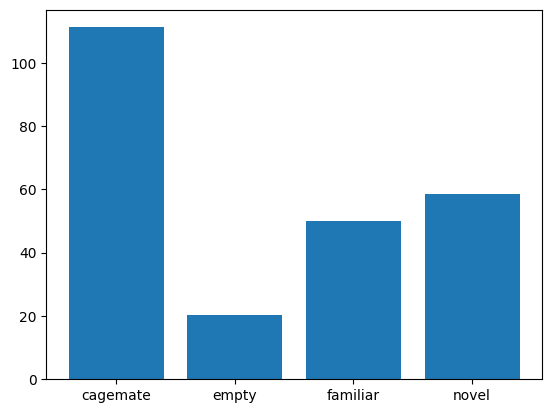

In [ ]:
last10min_df = masterLists[0] 

bar_stats = last10min_df.groupby('SocialAgent')['Duration (s)'].sum()/8


plt.bar(x = bar_stats.index, height = bar_stats)
# Group by 'Category' and 'Subcategory' and then calculate the sum of 'Value'
result_df = last10min_df.groupby(['File Name', 'SocialAgent'])['Duration (s)'].sum()
#save the result
result = 'last10min_data.xlsx'
result_df.to_excel(result, index=True)


# Plotting with SEM

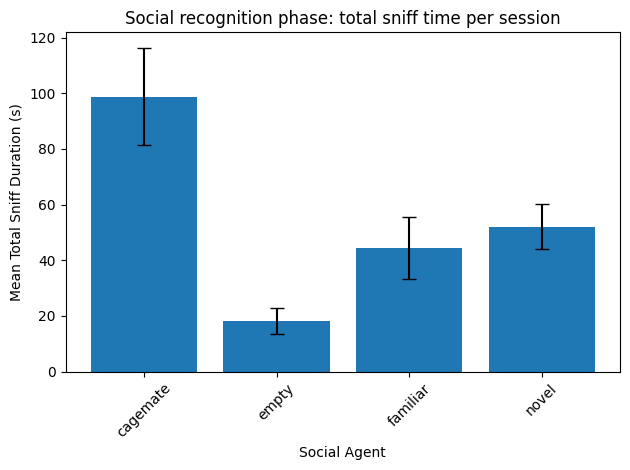

In [ ]:
last10min_df = masterLists[0] 

bar_stats = last10min_df.groupby(['File Name','SocialAgent'])['Duration (s)'].sum()
bar_stats = bar_stats.reset_index()

# Rename the columns to 'a' and 'b'
bar_stats = bar_stats.rename(columns={'level_0': 'File Name', 'level_1': 'SocialAgent'})

# Calculate SEM for each group (SocialAgent)
sem_by_group = bar_stats.groupby('SocialAgent')['Duration (s)'].apply(stats.sem)

# Calculate the mean of 'Duration (s)' for each group
plot_bar_stats = bar_stats.groupby('SocialAgent')['Duration (s)'].mean()

# Get the labels (group names)
labels = plot_bar_stats.index

# Plot the bar chart with SEM error bars
plt.bar(x=labels, height=plot_bar_stats, yerr=sem_by_group, capsize=5, align='center')
#, ,

# Labeling and customization
plt.xlabel('Social Agent')
plt.ylabel('Mean Total Sniff Duration (s)')
plt.title('Social recognition phase: total sniff time per session')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

# Group by 'Category' and 'Subcategory' and then calculate the sum of 'Value'

# Save the result
result = 'last10min_data.xlsx'
bar_stats.to_excel(result)

In [ ]:
from scipy import stats 
t_statistic, p_value = stats.ttest_ind(, data_group2)

SyntaxError: invalid syntax (3960325505.py, line 2)

# Second 10min Familiarization Phase

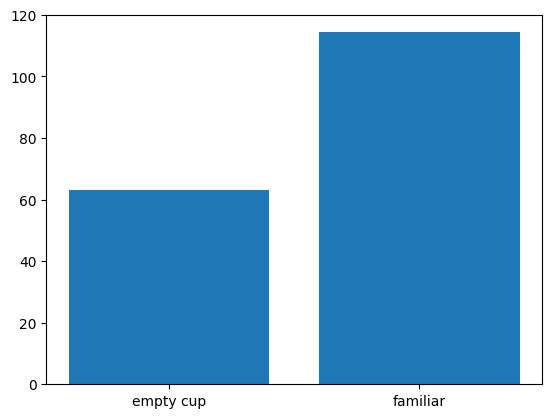

In [ ]:
second10min_df = masterLists[2]

second10min_stats = second10min_df.groupby('SocialAgent')['Duration (s)'].sum()/8

plt.bar(x = second10min_stats.index, height = second10min_stats)
# Group by 'Category' and 'Subcategory' and then calculate the sum of 'Value'
result_df = second10min_df.groupby(['File Name', 'SocialAgent'])['Duration (s)'].sum()
#save the result
result = 'second10min_data.xlsx'
result_df.to_excel(result, index=True)

# First 10mins Habituation Phase

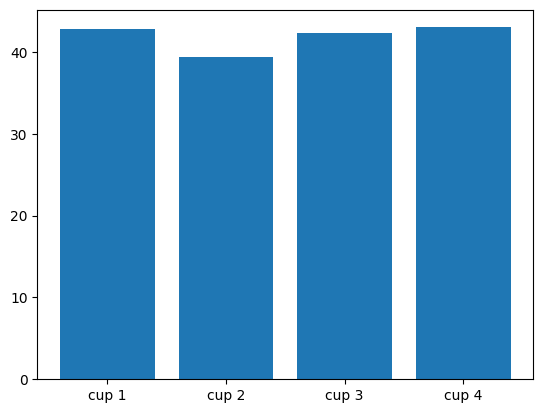

In [ ]:
first10min_df = masterLists[1]

first10min_stats = first10min_df.groupby("SocialAgent")['Duration (s)'].sum()/8

plt.bar(x = first10min_stats.index, height = first10min_stats)
# Group by 'Category' and 'Subcategory' and then calculate the sum of 'Value'
result_df = second10min_df.groupby(['File Name', 'SocialAgent'])['Duration (s)'].sum()
#save the result
result = 'first10min_data.xlsx'
result_df.to_excel(result, index=True)

# Third 10mins 

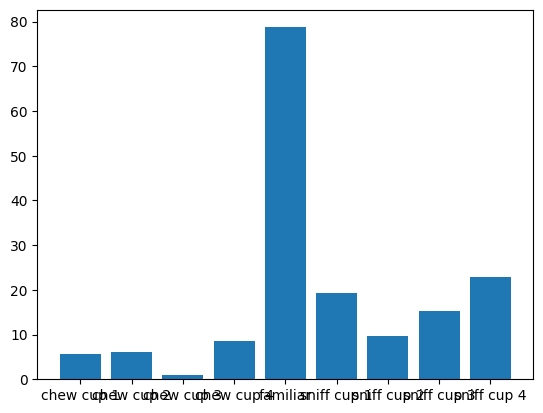

In [ ]:
third10min_df = masterLists[3]

third10min_stats = third10min_df.groupby("SocialAgent")['Duration (s)'].sum()/8

plt.bar(x = third10min_stats.index, height = third10min_stats)
# Group by 'Category' and 'Subcategory' and then calculate the sum of 'Value'
result_df = third10min_df.groupby(['File Name', 'SocialAgent'])['Duration (s)'].sum()
#save the result
result = 'third10min_data.xlsx'
result_df.to_excel(result, index=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5af4ec4f-bb5a-44fc-b66c-61573cb96cdd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>